0.7217068645640073


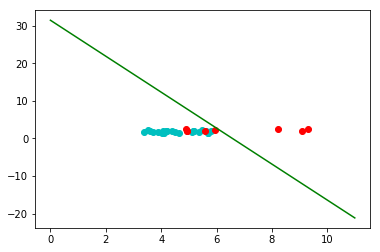

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
                            C=1.0, 
                            class_weight=None, 
                            multi_class='ovr', 
                            penalty='l2', 
                            solver='liblinear'
                           )

#读取数据
data = pd.read_csv('vehicle.csv')
#拿取特征与标签
labels = data['label']
data = data.drop(['label'],axis = 1)

#分离训练集与测试集
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(data, labels,test_size = 0.2 ,random_state = 1001)

#使用定义的模型进行训练
model.fit(feature_train, label_train)
prediction = model.predict(feature_test)

from sklearn.metrics import f1_score
prediction = model.predict(feature_test)

#使用f1_score进行评估
current_f1 = f1_score(prediction, label_test,average = 'macro')
print(current_f1)

plt.scatter(feature_test['length'][label_test=='car'], feature_test['width'][label_test=='car'], c='c')
plt.scatter(feature_test['length'][label_test=='truck'], feature_test['width'][label_test=='truck'], c='r')


# prediction

# print(model.coef_)
# print(model.intercept_)

coef = model.coef_
intercept = model.intercept_

# ax + by + c = 0
# y = (-ax -c ) / b

tt = np.arange(0,11,0.01).reshape(-1,1)
y_p = (tt * coef[0, 0] * -1 - intercept)/coef[0,1]

plt.plot(tt, y_p, c='g')

# coef
# y_p
# plt.plot*?